In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [322]:
df = pd.read_csv('ooi-ce01issm-rid16-03-ctdbpc000_95e2_9360_2b4f.csv')
print(df.shape)

(211190, 4)


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [323]:
df.columns

Index(['time', 'sea_water_temperature', 'sea_water_temperature_qc_agg', 'z'], dtype='object')

In [93]:
temp = df['sea_water_temperature'][1:-1].astype(float)
time = pd.to_datetime(df['time'][1:-1])

In [331]:
time[0:10]

1    2014-04-17 22:00:00+00:00
2    2014-04-17 22:10:00+00:00
3    2014-04-17 22:20:00+00:00
4    2014-04-17 22:30:00+00:00
5    2014-04-17 22:40:00+00:00
6    2014-04-17 22:50:00+00:00
7    2014-04-17 23:00:00+00:00
8    2014-04-17 23:10:00+00:00
9    2014-04-17 23:20:00+00:00
10   2014-04-17 23:30:00+00:00
Name: time, dtype: datetime64[ns, UTC]

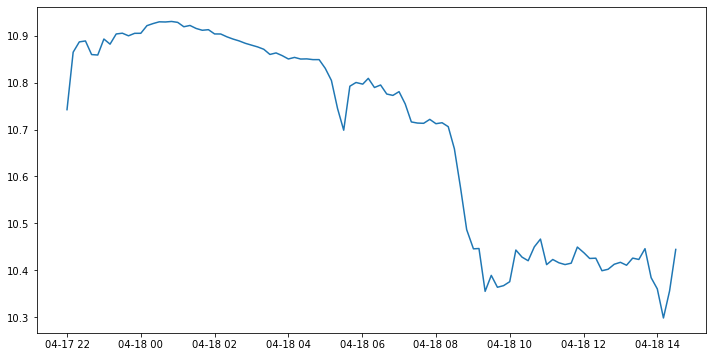

In [330]:
plt.figure(figsize=(12,6))
plt.plot(time[0:100],temp[0:100])

In [332]:
temp_hourly = temp.rolling(6).mean()[::6]
time_hourly = time[::6]

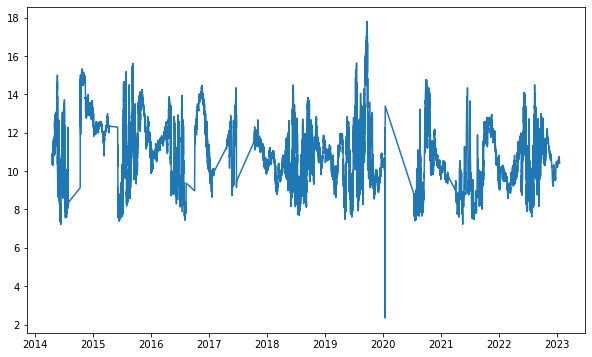

In [333]:
plt.figure(figsize=(10,6))
plt.plot(time_hourly[0:-1],temp_hourly[0:-1])

In [334]:
temp_daily = temp_hourly.rolling(24).mean()[2::24]
time_daily = time_hourly[2::24]

In [335]:
time_daily

13       2014-04-18 00:00:00+00:00
157      2014-04-19 00:01:00+00:00
301      2014-04-20 00:01:00+00:00
445      2014-04-21 00:01:00+00:00
589      2014-04-22 00:00:00+00:00
                    ...           
210541   2022-11-25 20:30:00+00:00
210685   2022-12-07 20:30:00+00:00
210829   2022-12-19 20:30:00+00:00
210973   2022-12-31 20:30:00+00:00
211117   2023-01-12 20:30:00+00:00
Name: time, Length: 1467, dtype: datetime64[ns, UTC]

# a better way

In [287]:
data = df[['time','sea_water_temperature']][1:-1]
data['sea_water_temperature'] = data['sea_water_temperature'].astype(float)
data['time'] = pd.to_datetime(data['time'])

data = data.rename(columns={"sea_water_temperature": "SST"})
data = data.set_index('time')

In [336]:
data_daily = data.resample('d').mean()

In [337]:
data_daily

,level_0,index,SST
time,,,
2014-04-17 00:00:00+00:00,5.5,5.5,10.874397
2014-04-18 00:00:00+00:00,83.5,83.5,10.627607
2014-04-19 00:00:00+00:00,227.5,227.5,10.434283
2014-04-20 00:00:00+00:00,371.5,371.5,10.380524
2014-04-21 00:00:00+00:00,515.5,515.5,10.792980
...,...,...,...
2023-01-14 00:00:00+00:00,211134.5,211134.5,10.766058
2023-01-15 00:00:00+00:00,211146.5,211146.5,10.705633
2023-01-16 00:00:00+00:00,211158.5,211158.5,10.550592


Text(0.5, 1.0, 'daily average')

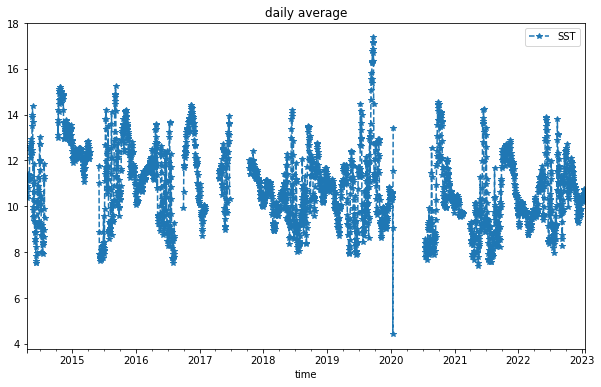

In [242]:
data_daily.plot(marker='*',linestyle='--',figsize=(10,6))
plt.title('daily average')

Text(0.5, 1.0, 'monthly average')

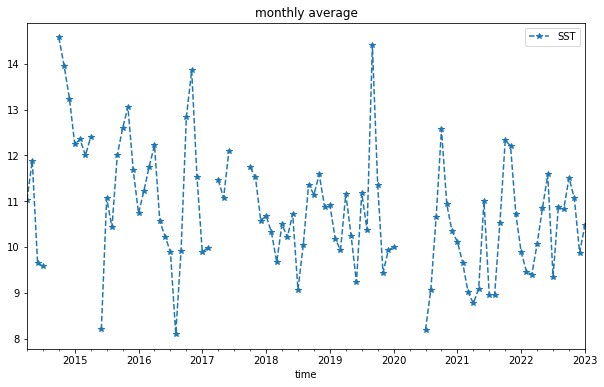

In [243]:
data_monthly = data.resample('M').mean()

data_monthly.plot(marker='*',linestyle='--',figsize=(10,6))
plt.title('monthly average')

# z-score

In [338]:
data_new = data.assign(SST_z = (data['SST']-data['SST'].mean())/data['SST'].std())

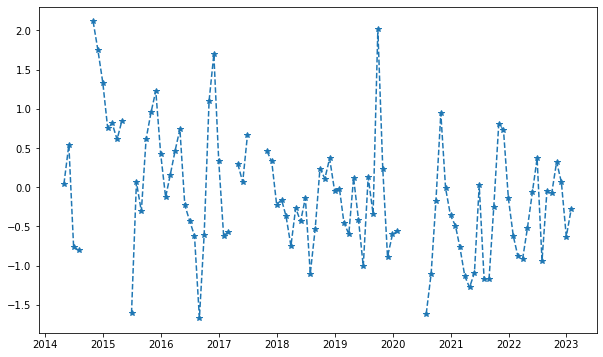

In [340]:
data_monthly_new = data_new.resample('M').mean()

plt.figure(figsize=(10,6))
plt.plot(data_monthly_new.index,data_monthly_new['SST_z'],marker='*',linestyle='--')